In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

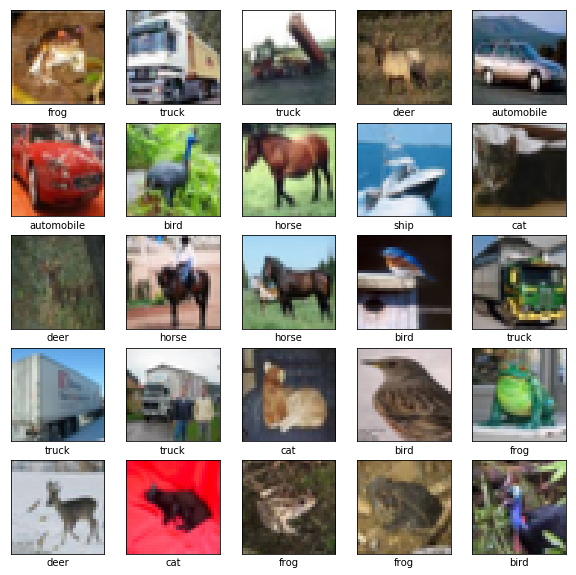

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [3]:
model1 = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1024, activation='relu', use_bias=True),
    layers.Dense(10, activation='softmax', use_bias=True)
])

model1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
from datetime import datetime
# Define the Keras TensorBoard callback.

# Train the model.
history1 = model1.fit(
    train_images,
    train_labels, 
    epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 27s 544us/sample - loss: 1.8503 - accuracy: 0.3404
Epoch 2/10
50000/50000 [==============================] - 30s 607us/sample - loss: 1.6675 - accuracy: 0.4134
Epoch 3/10
50000/50000 [==============================] - 30s 606us/sample - loss: 1.5912 - accuracy: 0.4431
Epoch 4/10
50000/50000 [==============================] - 30s 592us/sample - loss: 1.5394 - accuracy: 0.4615
Epoch 5/10
50000/50000 [==============================] - 30s 598us/sample - loss: 1.4963 - accuracy: 0.4764
Epoch 6/10
50000/50000 [==============================] - 32s 637us/sample - loss: 1.4608 - accuracy: 0.4882
Epoch 7/10
50000/50000 [==============================] - 32s 630us/sample - loss: 1.4282 - accuracy: 0.5031
Epoch 8/10
50000/50000 [==============================] - 33s 653us/sample - loss: 1.4021 - accuracy: 0.5110
Epoch 9/10
50000/50000 [==============================] - 30s 601us/sample - loss: 1.3741 - accuracy: 0.5

['loss', u'accuracy']


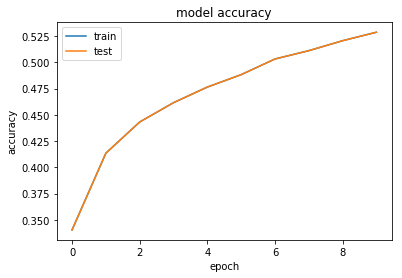

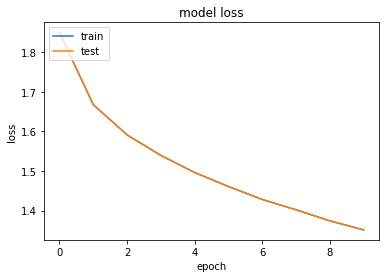

In [5]:
# list all data in history
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history[u'accuracy'])
plt.plot(history1.history[u'accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
model1.evaluate(test_images,  test_labels, verbose=2)

10000/1 - 3s - loss: 1.6131 - accuracy: 0.4645


[1.5159941074371337, 0.4645]

In [7]:
model2 = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1024, activation='relu', use_bias=True),
    layers.Dense(10, activation='softmax', use_bias=True)
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
from datetime import datetime
# Define the Keras TensorBoard callback.

# Train the model.
history2 = model2.fit(
    train_images,
    train_labels, 
    epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 40s 792us/sample - loss: 1.8932 - accuracy: 0.3330
Epoch 2/10
50000/50000 [==============================] - 36s 727us/sample - loss: 1.6935 - accuracy: 0.3999
Epoch 3/10
50000/50000 [==============================] - 38s 753us/sample - loss: 1.6158 - accuracy: 0.4263
Epoch 4/10
50000/50000 [==============================] - 38s 767us/sample - loss: 1.5717 - accuracy: 0.4407
Epoch 5/10
50000/50000 [==============================] - 42s 840us/sample - loss: 1.5420 - accuracy: 0.4510
Epoch 6/10
50000/50000 [==============================] - 35s 693us/sample - loss: 1.5255 - accuracy: 0.4552
Epoch 7/10
50000/50000 [==============================] - 41s 829us/sample - loss: 1.4990 - accuracy: 0.4704
Epoch 8/10
50000/50000 [==============================] - 39s 788us/sample - loss: 1.4846 - accuracy: 0.4715
Epoch 9/10
50000/50000 [==============================] - 36s 718us/sample - loss: 1.4644 - accuracy: 0.4

['loss', u'accuracy']


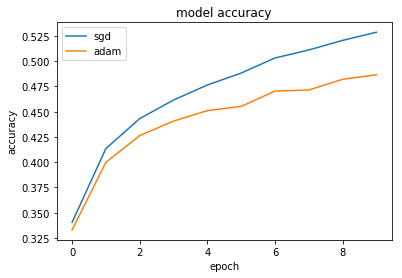

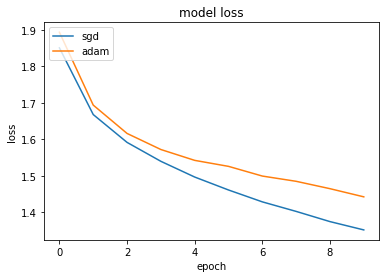

In [11]:
# list all data in history
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history1.history[u'accuracy'])
plt.plot(history2.history[u'accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['sgd', 'adam'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sgd', 'adam'], loc='upper left')
plt.show()

In [12]:
model3 = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(2048, activation='relu', use_bias=True),
    layers.Dense(1024, activation='relu', use_bias=True),
    layers.Dense(10, activation='softmax', use_bias=True)
])

model3.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
from datetime import datetime
# Define the Keras TensorBoard callback.

# Train the model.
history3 = model3.fit(
    train_images,
    train_labels, 
    epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.8217 - accuracy: 0.3496
Epoch 2/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.6334 - accuracy: 0.4242
Epoch 3/10
50000/50000 [==============================] - 75s 1ms/sample - loss: 1.5471 - accuracy: 0.4518
Epoch 4/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 1.4885 - accuracy: 0.4764
Epoch 5/10
50000/50000 [==============================] - 78s 2ms/sample - loss: 1.4363 - accuracy: 0.4912
Epoch 6/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 1.3982 - accuracy: 0.5083
Epoch 7/10
50000/50000 [==============================] - 79s 2ms/sample - loss: 1.3578 - accuracy: 0.5218
Epoch 8/10
50000/50000 [==============================] - 77s 2ms/sample - loss: 1.3251 - accuracy: 0.5335
Epoch 9/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.2936 - accuracy: 0.5464
Epoch 10/10
50

['loss', u'accuracy']


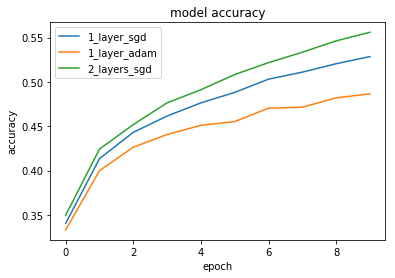

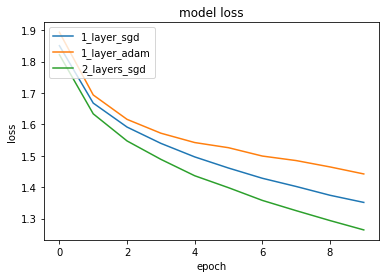

In [14]:
# list all data in history
print(history3.history.keys())
# summarize history for accuracy
plt.plot(history1.history[u'accuracy'])
plt.plot(history2.history[u'accuracy'])
plt.plot(history3.history[u'accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['1_layer_sgd', '1_layer_adam', '2_layers_sgd'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1_layer_sgd', '1_layer_adam', '2_layers_sgd'], loc='upper left')
plt.show()

In [15]:
model4 = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(2048, activation='relu', use_bias=True),
    layers.Dense(1024, activation='relu', use_bias=True),
    layers.Dense(512, activation='relu', use_bias=True),
    layers.Dense(10, activation='softmax', use_bias=True)
])

model4.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
from datetime import datetime
# Define the Keras TensorBoard callback.

# Train the model.
history4 = model4.fit(
    train_images,
    train_labels, 
    epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 96s 2ms/sample - loss: 1.4550 - accuracy: 0.4819
Epoch 2/10
50000/50000 [==============================] - 78s 2ms/sample - loss: 1.4049 - accuracy: 0.5021
Epoch 3/10
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.3641 - accuracy: 0.5176
Epoch 4/10
50000/50000 [==============================] - 84s 2ms/sample - loss: 1.3236 - accuracy: 0.5295
Epoch 5/10
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.2856 - accuracy: 0.5434
Epoch 6/10
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.2515 - accuracy: 0.5599
Epoch 7/10
50000/50000 [==============================] - 84s 2ms/sample - loss: 1.2191 - accuracy: 0.5706
Epoch 8/10
50000/50000 [==============================] - 103s 2ms/sample - loss: 1.1861 - accuracy: 0.5843
Epoch 9/10
50000/50000 [==============================] - 96s 2ms/sample - loss: 1.1534 - accuracy: 0.5942
Epoch 10/10
5

['loss', u'accuracy']


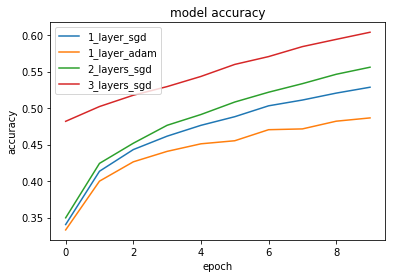

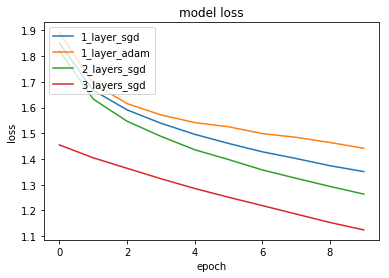

In [18]:
# list all data in history
print(history4.history.keys())
# summarize history for accuracy
plt.plot(history1.history[u'accuracy'])
plt.plot(history2.history[u'accuracy'])
plt.plot(history3.history[u'accuracy'])
plt.plot(history4.history[u'accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['1_layer_sgd', '1_layer_adam', '2_layers_sgd', '3_layers_sgd'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.plot(history4.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1_layer_sgd', '1_layer_adam', '2_layers_sgd', '3_layers_sgd'], loc='upper left')
plt.show()

In [28]:
model5 = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1024, activation='relu', use_bias=True),
    layers.Dense(10, activation='softmax', use_bias=True)
])

model5.compile(optimizer='sgd',
              loss='kullback_leibler_divergence',
              metrics=['accuracy'])

In [29]:
from datetime import datetime
# Define the Keras TensorBoard callback.

# Train the model.
history5 = model5.fit(
    train_images,
    train_labels,
    validation_data = (test_images, test_labels),
    epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 34s 674us/sample - loss: 20.8372 - accuracy: 0.0504 - val_loss: 20.7241 - val_accuracy: 0.0424
Epoch 2/10
50000/50000 [==============================] - 41s 820us/sample - loss: 20.7239 - accuracy: 0.0419 - val_loss: 20.7238 - val_accuracy: 0.0320
Epoch 3/10
50000/50000 [==============================] - 35s 704us/sample - loss: 20.7237 - accuracy: 0.0358 - val_loss: 20.7237 - val_accuracy: 0.0343
Epoch 4/10
50000/50000 [==============================] - 32s 635us/sample - loss: 20.7236 - accuracy: 0.0503 - val_loss: 20.7236 - val_accuracy: 0.0291
Epoch 5/10
50000/50000 [==============================] - 31s 624us/sample - loss: 20.7235 - accuracy: 0.0281 - val_loss: 20.7235 - val_accuracy: 0.0242
Epoch 6/10
50000/50000 [==============================] - 33s 661us/sample - loss: 20.7235 - accuracy: 0.0251 - val_loss: 20.7235 - val_accuracy: 0.0234
Epoch 7/10
50000/50000 [========

['loss', u'accuracy']


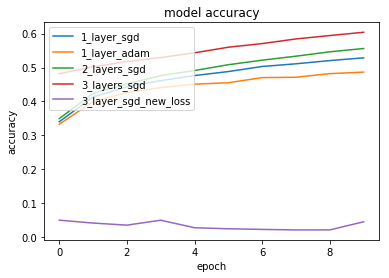

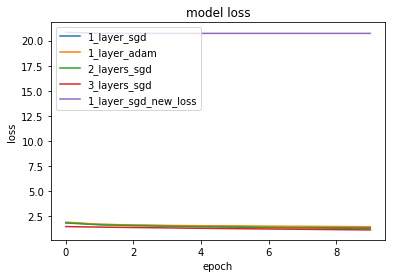

In [30]:
# list all data in history
print(history4.history.keys())
# summarize history for accuracy
plt.plot(history1.history[u'accuracy'])
plt.plot(history2.history[u'accuracy'])
plt.plot(history3.history[u'accuracy'])
plt.plot(history4.history[u'accuracy'])
plt.plot(history5.history[u'accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['1_layer_sgd', '1_layer_adam', '2_layers_sgd', '3_layers_sgd', '3_layer_sgd_new_loss'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.plot(history4.history['loss'])
plt.plot(history5.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1_layer_sgd', '1_layer_adam', '2_layers_sgd', '3_layers_sgd', '1_layer_sgd_new_loss'], loc='upper left')
plt.show()